# Value at Risk

In [30]:
import numpy as np
import scipy.stats

#test scipy.stats

scipy.stats.norm.ppf(0.95)

1.6448536269514722

In [31]:
def VaR(position, sigma, quantile):
    return position*sigma*scipy.stats.norm.ppf(quantile)


In [32]:
VaR(1000,0.05,0.95)

82.24268134757361

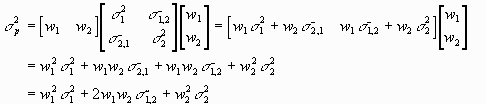


In [54]:
w1 = 0.5
w2 = 0.5
sigma1 = 0.07
sigma2 = 0.03
corr = 0.4

portfolioVar = w1**2*sigma1**2+w2**2*sigma2**2+2*(w1*w2*sigma1*sigma2*corr)

portfolioVol = portfolioVar**(1/2)
print('PortVolatility = ', portfolioVol)
print('Value at Risk (VAR) = ', VaR(1000,portfolioVol,0.95))

PortVolatility =  0.043243496620879306
Value at Risk (VAR) =  71.12922225891705


# VaR Algebratic approach

In [49]:
VaR1 = VaR(1000*w1,sigma1,0.95)
VaR2 = VaR(1000*w2,sigma2,0.95)
vector = np.array([VaR1,VaR2])
vector


array([57.56987694, 24.6728044 ])

In [51]:
corrmatrix = np.array([[1,corr],[corr,1]])
corrmatrix

array([[1. , 0.4],
       [0.4, 1. ]])

In [53]:
(np.dot(np.dot(vector, corrmatrix),vector))**(1/2)

71.12922225891707

# VaR using using actual data

In [4]:
#pip install pandas_datareader
import numpy as np
import pandas_datareader.data as reader
import datetime as dt

end = dt.datetime.now()
start = dt.datetime(end.year-1, end.month, end.day)

df = reader.get_data_yahoo(['AAPL','MSFT','TSLA'],start,end)['Adj Close']

returns = np.log(1+ df.pct_change())

returns


Symbols         AAPL      MSFT      TSLA
Date                                    
2021-03-03       NaN       NaN       NaN
2021-03-04 -0.015938 -0.003654 -0.049844
2021-03-05  0.010681  0.021252 -0.038532
2021-03-08 -0.042567 -0.018345 -0.060228
2021-03-09  0.039845  0.027714  0.179327
...              ...       ...       ...
2022-02-25  0.012882  0.009191  0.011300
2022-02-28  0.001636  0.004966  0.072114
2022-03-01 -0.011696 -0.012935 -0.006986
2022-03-02  0.020379  0.017610  0.017796
2022-03-03  0.006940  0.002412 -0.016108

[254 rows x 3 columns]

In [24]:
returns.std()

Symbols
AAPL    0.015191
MSFT    0.014232
TSLA    0.035410
dtype: float64

In [7]:
position = df.iloc[-1]
position

Symbols
AAPL    167.720001
MSFT    300.915009
TSLA    865.830017
Name: 2022-03-03 00:00:00, dtype: float64

In [26]:
VaRarray = []
for i in range(len(position)):
    VaRarray.append(VaR(position[i],returns.std()[i],0.95))
    
VaRarray

[4.190883689935422, 7.044052887185362, 50.42959328750968]

In [27]:
vector = np.array(VaRarray)

In [28]:
returns.corr()

Symbols      AAPL      MSFT      TSLA
Symbols                              
AAPL     1.000000  0.699588  0.458268
MSFT     0.699588  1.000000  0.413661
TSLA     0.458268  0.413661  1.000000

In [45]:
Value_at_Risk = (np.dot(np.dot(vector, returns.corr()),vector))**(1/2)
print('Value at Risk = ', Value_at_Risk)

Value at Risk =  56.02877668647499
